<span style="font-size:30px;color:#1C90DB"> Treatment code - A.DZIDUCH & A.BAUDOUX </span>


In [137]:
import pandas as pd
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np 


In [112]:
campaign = "AFLUX"
vol = "4"
path = "C:/Users\dziduch\Documents\ALL\Traitement\AFLUX_OAP\Vol"+ str(vol) + "/PSD/"

In [184]:
file_avion = Dataset(path + "Avion.nc")
time = file_avion.variables['time'][:]
Avion = pd.DataFrame(time) 
Avion.columns = ["T"]
Avion['T']= pd.to_datetime(Avion['T'], unit='s')

Avion['Time'] = Avion['T'].dt.hour * 3600 + Avion['T'].dt.minute * 60 + Avion['T'].dt.second
Avion.drop(columns=['T'], inplace=True)

AP = file_avion.variables['Asymmetry_Parameter'][:]
Avion['AP'] = pd.DataFrame(AP)

## PSD complètre pour 2DS ##

DS_all_dcc = pd.read_csv(path + "AFLUX_"+str(vol) +"_all_psd_dcc.csv", delimiter=',')
DS_all_deq = pd.read_csv(path + "AFLUX_"+str(vol) +"_all_psd_deq.csv", delimiter=',')
DS_all_dmax = pd.read_csv(path + "AFLUX_"+str(vol) +"_all_psd_dmax.csv", delimiter=',')

# Time # 
Time_2DS = DS_all_dmax.iloc[:,0].astype(int)
# Dmax # 
DS_all_dmax.rename(columns={DS_all_dmax.columns[0]: "Time"}, inplace=True)
DS_all_dmax = pd.DataFrame(DS_all_dmax)
DS_all_dmax.set_index("Time", inplace=True)

## PSD Ice avec circularitée supérieure à 1.25 ##

DS_circularity_dcc = pd.read_csv(path + "AFLUX_"+str(vol) +"_circularity_psd_dcc.csv", delimiter=',') 
DS_circularity_deq = pd.read_csv(path + "AFLUX_"+str(vol) +"_circularity_psd_deq.csv", delimiter=',')
DS_circularity_dmax = pd.read_csv(path + "AFLUX_"+str(vol) +"_circularity_psd_dmax.csv", delimiter=',')

# Dmax # 
DS_circularity_dmax.rename(columns={DS_circularity_dmax.columns[0]: "Time"}, inplace=True)
DS_circularity_dmax = pd.DataFrame(DS_circularity_dmax)
DS_circularity_dmax.set_index("Time", inplace=True)

Time_2DS = pd.DataFrame(Time_2DS)
Time_2DS.columns = ["Time"]
DS_BinMid = range(10, 1270, 10)
DS_circu_BinMid = range(10, 1281, 10)

## PSD CAS ## 
file_CAS = Dataset(path + "CAS.nc")
time = file_CAS.variables['time'][:]
CAS = pd.DataFrame(time) 
CAS.columns = ["T"]
CAS['T']= pd.to_datetime(CAS['T'], unit='s')

CAS['Time'] = CAS['T'].dt.hour * 3600 + CAS['T'].dt.minute * 60 + CAS['T'].dt.second
CAS.drop(columns=['T'], inplace=True)

CAS_dNdD = file_CAS.variables['dNdD'][:]
CAS_dNdD = pd.DataFrame(CAS_dNdD/1e9, index= CAS['Time'])
    
CAS_BinsMid = file_CAS.variables['bin_mid'][:]
CAS_BinsMid = pd.DataFrame(CAS_BinsMid)

## PSD PIP ## 

file_PIP = Dataset(path + "PIP.nc")
time = file_PIP.variables['time'][:]
PIP= pd.DataFrame(time) 
PIP.columns = ["T"]
PIP['T']= pd.to_datetime(PIP['T'], unit='s')

PIP['Time'] = PIP['T'].dt.hour * 3600 + PIP['T'].dt.minute * 60 + PIP['T'].dt.second
PIP.drop(columns=['T'], inplace=True)

PIP_dNdD = file_PIP.variables['dNdD'][:]
PIP_dNdD = pd.DataFrame(PIP_dNdD/1e9, index= PIP['Time'])
    
PIP_BinsMid = file_PIP.variables['bin_mid'][:]
PIP_BinsMid = pd.DataFrame(PIP_BinsMid)

## PSD CIP ## 

file_CIP = Dataset(path + "CIP.nc")
time = file_CIP.variables['time'][:]
CIP= pd.DataFrame(time) 
CIP.columns = ["T"]
CIP['T']= pd.to_datetime(CIP['T'], unit='s')

CIP['Time'] = CIP['T'].dt.hour * 3600 + CIP['T'].dt.minute * 60 + CIP['T'].dt.second
CIP.drop(columns=['T'], inplace=True)

CIP_dNdD = file_CIP.variables['dNdD'][:]
CIP_dNdD = pd.DataFrame(CIP_dNdD/1e9, index= CIP['Time'])
    
CIP_BinsMid = file_CIP.variables['bin_mid'][:]
CIP_BinsMid = pd.DataFrame(CIP_BinsMid)


<span style="font-size:20px;color:#1C90DB"> Average PSD on the flight </span>


In [185]:
CIP_dNdD_mean = CIP_dNdD.mean()
PIP_dNdD_mean = PIP_dNdD.mean()
CAS_dNdD_mean = CAS_dNdD.mean()
DS_dNdD_all_dmax_mean = DS_all_dmax.mean()
DS_circularity_dmax_mean = DS_circularity_dmax.mean()

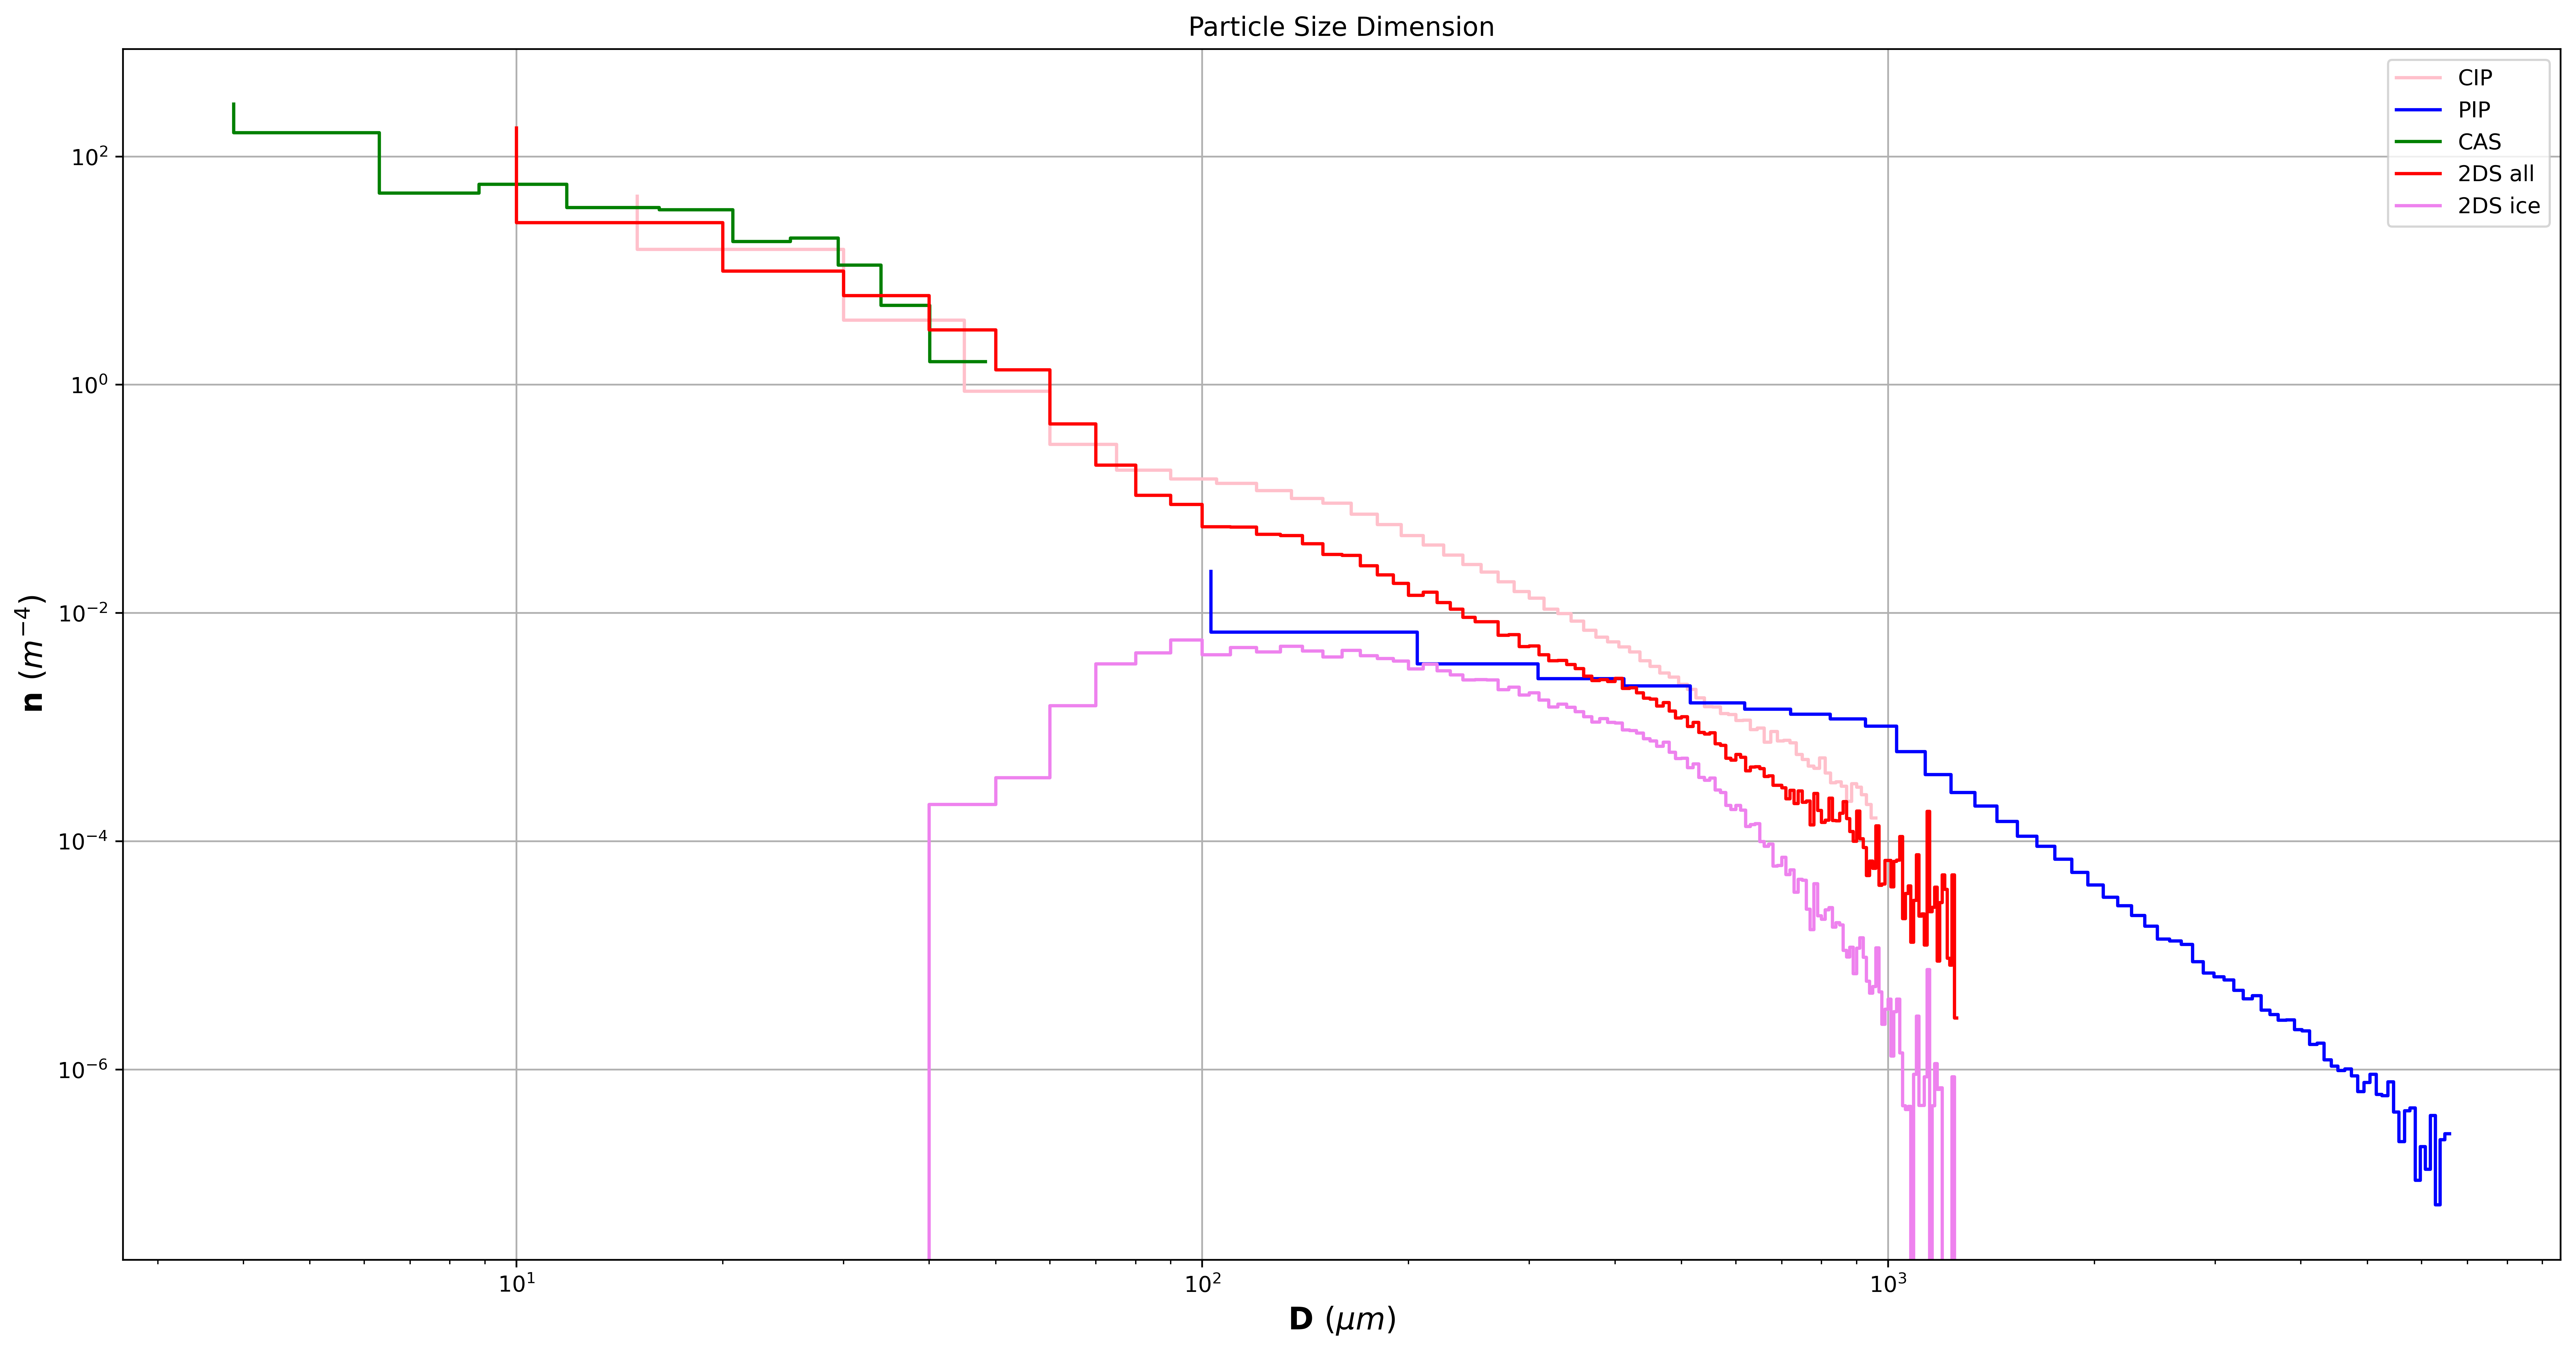

In [186]:
plt.figure(figsize=(20,10), dpi = 500)

plt.step(CIP_BinsMid, CIP_dNdD_mean, color="pink", label='CIP')
plt.step(BinsMid_PIP,PIP_dNdD_mean, color="blue", label='PIP')
plt.step(CAS_BinsMid,CAS_dNdD_mean, color="green", label='CAS')
plt.step(DS_BinMid,DS_dNdD_all_dmax_mean, color="red", label='2DS all')
plt.step(DS_circu_BinMid,DS_circularity_dmax_mean, color="violet", label='2DS ice')

plt.xscale('log')
plt.yscale('log')

plt.title('Particle Size Dimension')
plt.xlabel(r'D $(\mu m)$', fontsize=14,fontweight="bold")
plt.ylabel(r'n $(m^{-4})$', fontsize=14,fontweight="bold")
plt.grid()
plt.legend()
plt.show()

In [187]:
Avion = pd.merge(Time_2DS, Avion, on="Time",how="left")
Avion.set_index("Time", inplace=True)

CAS_dNdD = pd.merge(Time_2DS, CAS_dNdD, on="Time",how="left")
CAS_dNdD.set_index("Time", inplace=True)

CIP_dNdD = pd.merge(Time_2DS, CIP_dNdD, on="Time",how="left")
CIP_dNdD.set_index("Time", inplace=True)

PIP_dNdD = pd.merge(Time_2DS, PIP_dNdD, on="Time",how="left")
PIP_dNdD.set_index("Time", inplace=True)

DS_all_dmax = pd.merge(Time_2DS, DS_all_dmax, on="Time",how="left")
DS_all_dmax.set_index("Time", inplace=True)

DS_circularity_dmax = pd.merge(Time_2DS, DS_circularity_dmax, on="Time",how="left")
DS_circularity_dmax.set_index("Time", inplace=True)

if len(CAS_dNdD) == len(CIP_dNdD) == len(DS_all_dmax) : 
    print("Le traitement peut commencer, ça va barder !")


Le traitement peut commencer, ça va barder !


In [189]:
def PSD_ice : $


0.29142967
